# Microclase 
¿Qué factores influyen en el desarrollo humano?                    
En este trabajo nos enfocaremos en la estatura de las personas y el consumo de proteína.

## Configuración del entorno



In [ ]:
import pandas as pd                                     #Biblioteca para manipulación de dataset
import matplotlib.pyplot as plt                         #Manejo de gráficos
import seaborn as sns
!pip install pycountry
import pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 4.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=da3069c75f06a5f3f4680faaa0f9448f9b54a26cf8d7443722228aaa3a4c12fb
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
altura_de_personas_por_pais = pd.read_csv("https://raw.githubusercontent.com/JZylber/Profesorado/main/altura_de_personas_por_pais.csv")
altura_de_personas_por_pais.rename(columns={'Age group':'Edad','Sex':'Sexo','Mean height':'Promedio', 'Country': 'País','Year':'Año'}, inplace=True)
altura_de_personas_por_pais.drop(columns = ["Mean height lower 95% uncertainty interval","Mean height upper 95% uncertainty interval","Mean height standard error"],inplace = True)
altura_de_personas_por_pais['Sexo'] = altura_de_personas_por_pais['Sexo'].apply(lambda sex: "Hombres" if sex == "Boys" else "Mujeres")
#altura_de_personas_por_pais.sample(10)

consumo_de_proteinas_por_pais = pd.read_csv("https://raw.githubusercontent.com/JZylber/Profesorado/main/daily-per-capita-protein-supply.csv")

In [ ]:
def alpha3code(country):
        try:
            return pycountry.countries.get(name=country).alpha_3
          
        except:
            return None
altura_de_personas_por_pais['CODE']=altura_de_personas_por_pais.País.apply(alpha3code)

In [ ]:

missing_codes = {
    "Bolivia":"BOL",
    "China (Hong Kong SAR)":"HKG",
    "Cote d'Ivoire":"CIV",
    'Czech Republic':"CZE",
    'DR Congo':"COD",
    'Guinea Bissau':"GNB",
    'Iran':"IRN", 
    'Lao PDR':"LAO", 
    'Macedonia (TFYR)':'MKD',
    'Micronesia (Federated States of)':"FSM", 
    'Moldova':"MDA", 
    'North Korea':"PRK",
    'Occupied Palestinian Territory':"PSG", 
    'South Korea':"KOR", 
    'Swaziland':"SWZ",
    'Taiwan':"TWN", 
    'Tanzania':"TZA", 
    'United States of America':"USA", 
    'Venezuela':"VEN"
}
def replace_missing_codes(row):
  if row["CODE"]== None:
    try:
      return missing_codes[row["País"]]
    except KeyError:
      return None
  else:
    return row["CODE"]
altura_de_personas_por_pais["CODE"] = altura_de_personas_por_pais.apply(replace_missing_codes,axis=1)

In [ ]:
altura_y_proteinas = altura_de_personas_por_pais.merge(consumo_de_proteinas_por_pais, how="inner", left_on=['CODE',"Año"], right_on=['Code',"Year"])
#print([pais for pais in altura_de_personas_por_pais.País.unique() if not pais in altura_y_proteinas.País.unique()])
#print([pais for pais in consumo_de_proteinas_por_pais.Entity.unique() if not pais in altura_y_proteinas.Entity.unique()])
altura_y_proteinas.drop(columns = ["Entity","Code","Year"],inplace = True)
altura_y_proteinas.rename(columns={'Protein supply quantity (g/capita/day) (FAO, 2020)':'Promedio de consumo por persona por día (g)'}, inplace=True)

In [ ]:
nombres_paises = altura_y_proteinas['País'].unique()

In [ ]:
def year_height(paises,edad,año_inicio,año_fin,ax = None):
  try:
    if not edad in range(6,20):
      raise Exception(f"Los años van entre 6 y 19, y ustedes pusieron {edad}")
    for pais in paises:
      if not isinstance(pais,str):
        raise TypeError(f"¡Guarda! Los países van entre comillas.")
      if not pais in nombres_paises: 
        raise Exception(f"No hay datos del pais {pais}. ¿Lo escribieron bien? Revisen la lista")
    data_pais = altura_y_proteinas[(altura_y_proteinas['Edad'] == edad) & (altura_y_proteinas['País'].isin(paises)) & ( altura_y_proteinas['Año'] <= año_fin) & ( altura_y_proteinas['Año'] >= año_inicio)]
    sns.set_theme(style="darkgrid")
    if ax == None: 
      sns.lineplot(x="Año", y="Promedio", hue="País", style = "Sexo", data=data_pais)
    else:
       sns.lineplot(x="Año", y="Promedio",
                  hue="País", style = "Sexo", data=data_pais, ax = ax)
  except TypeError as error: 
    print(f"ERROR: {error}")
  except Exception as error: 
    print(f"ERROR: {error}")
sns.set(rc={'figure.figsize':(12,8)})


In [ ]:
def year_protein(paises,año_inicio,año_fin,ax = None):
  try:
    for pais in paises:
      if not isinstance(pais,str):
        raise TypeError(f"¡Guarda! Los países van entre comillas.")
      if not pais in nombres_paises: 
        raise Exception(f"No hay datos del pais {pais}. ¿Lo escribieron bien? Revisen la lista")
    data_pais = altura_y_proteinas[(altura_y_proteinas['País'].isin(paises)) & ( altura_y_proteinas['Año'] <= año_fin) & ( altura_y_proteinas['Año'] >= año_inicio)]
    sns.set_theme(style="darkgrid")
    if ax == None:
      sns.lineplot(x="Año", y="Promedio de consumo por persona por día (g)",hue = "País", data=data_pais)
    else:
      sns.lineplot(x="Año", y="Promedio de consumo por persona por día (g)",hue = "País", data=data_pais, ax = ax)
  except TypeError as error: 
    print(f"ERROR: {error}")
  except Exception as error: 
    print(f"ERROR: {error}")
sns.set(rc={'figure.figsize':(12,8)})


##Inspección: 
En esta etapa vamos a ver parte del contenido del dataset. Esto nos dará una idea del tipo de datos que estamos manejando. 
Trabajaremos con las siguientes columnas: 

*   'País': Esta columna contiene todos los países del mundo (en inglés)
*   'Edad': Esta columna hace refencia a las edades entre 5 y 19 años.
*   'Año': Esta columna hace referencia al año sobre el cual se hizo el cálculo de estatura.
*   'Promedio': En esta columna se guarda el promedio de altura para una edad y un año.
*   'Género': Los datos están cargados tanto para hombres como para mujeres.
*   'Promedio de consumo por persona por día (g)': Proteína consumida por día en promedio per cápita.

In [ ]:
altura_y_proteinas.info()      #contenido del dataset, sus columnas y el tipo de dato que se guardan.     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162210 entries, 0 to 162209
Data columns (total 7 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   País                                         162210 non-null  object 
 1   Sexo                                         162210 non-null  object 
 2   Año                                          162210 non-null  int64  
 3   Edad                                         162210 non-null  int64  
 4   Promedio                                     162210 non-null  float64
 5   CODE                                         162210 non-null  object 
 6   Promedio de consumo por persona por día (g)  162210 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 9.9+ MB


### Edades para el análisis

In [ ]:
altura_y_proteinas.Edad.unique()  #Edades de interés para el análisis.

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

### Países disponibles

In [ ]:
print("Países Disponibles:")
for pais in nombres_paises:
  print(pais)

Países Disponibles:
Afghanistan
Albania
Algeria
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
China (Hong Kong SAR)
Colombia
Congo
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czech Republic
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Ethiopia
Fiji
Finland
France
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Kuwait
Kyrgyzstan
Lao PDR
Latvia
Lebanon
Lesotho
Liberia
Lithuania
Luxembourg
Macedonia (TFYR)
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Mauritania
Mauritius
Mexico
Moldova
Mongolia
Montenegro
Morocco
Mozambi

## Análisis



### Desempeño No 1: Altura en el tiempo
Modificar las variables

*   Países: seleccionar de la sección inpección->países disponibles
*   Edades: de la sección inspección->edades para el análisis.

Importante: Cuando actualizan datos, correr nuevamente.

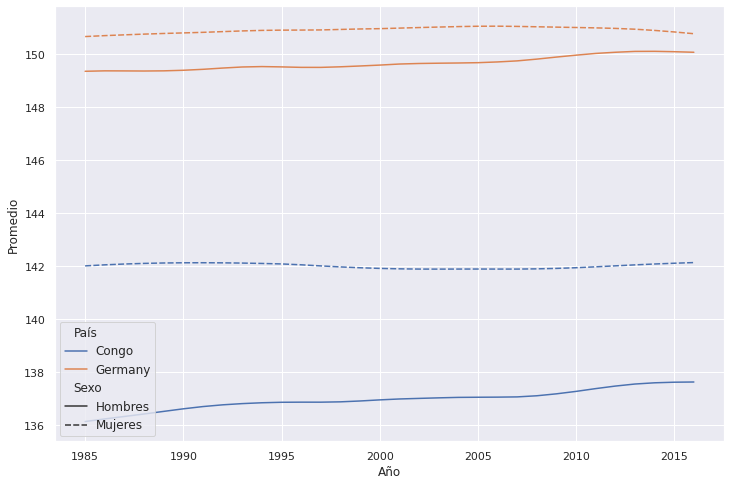

In [ ]:
paises = ["Germany","Congo"]                            #entre corchetes podemos agregar la cantidad de países que querramos.
edad = 11
año_inicio,año_fin = 1985,2016
year_height(paises,edad,año_inicio,año_fin)

### Desempeño No 2: Proteínas en el tiempo
Modificar las variables

*   Países: seleccionar de la sección inpección->países disponibles

Importante: Cuando actualizan datos, correr nuevamente.

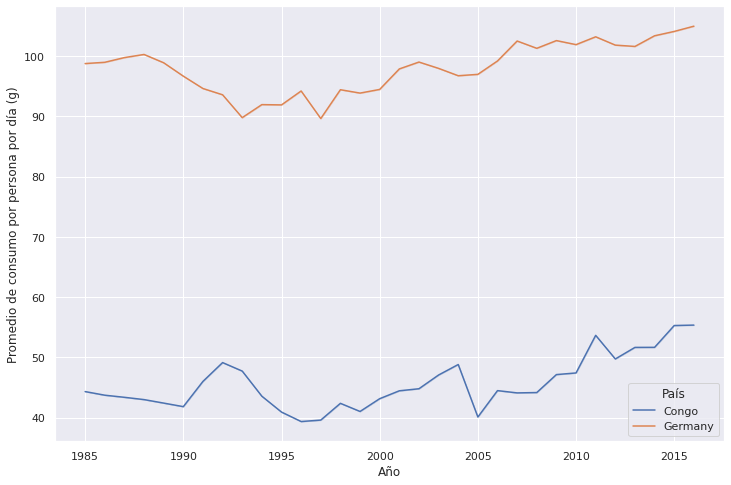

In [ ]:
paises = ["Germany","Congo"]
año_inicio,año_fin = 1985,2016
year_protein(paises,año_inicio,año_fin)

### Gráficos en simultáneo
Modificar las variables

*   Países: seleccionar de la sección inpección->países disponibles
*   Edades: de la sección inspección->edades para el análisis.

Importante: Cuando actualizan datos, correr nuevamente.

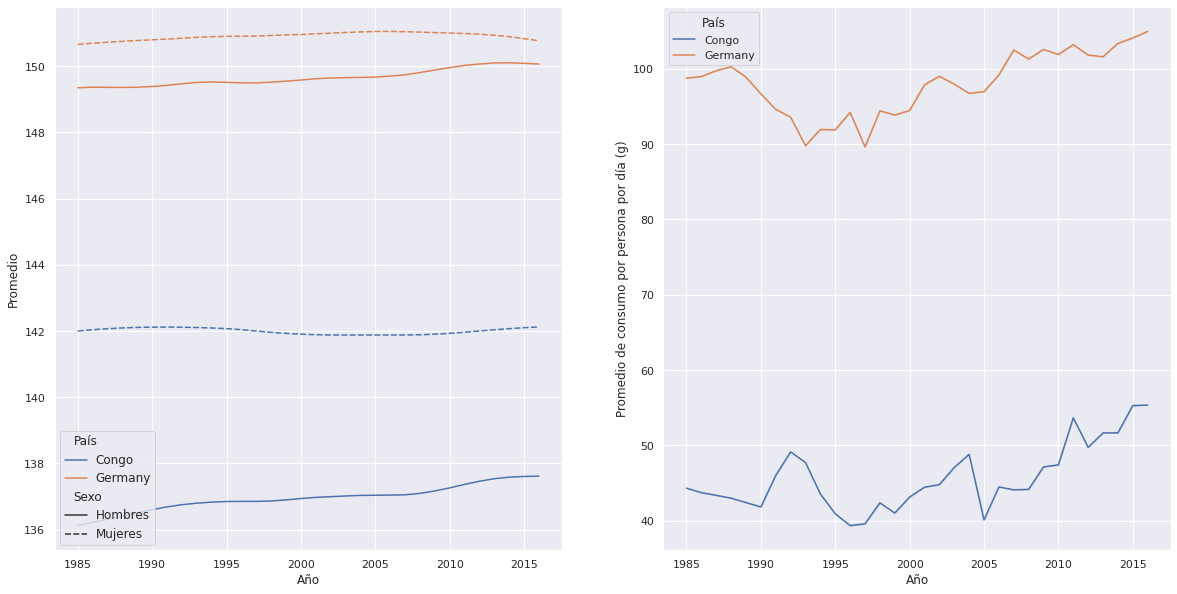

In [ ]:
paises = ["Germany","Congo"]
edad = 11
año_inicio,año_fin = 1985,2016

#A partir de acá no hace falta que toquen nada
fig, ax =plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(20)
year_height(paises,edad,año_inicio,año_fin,ax[0])
year_protein(paises,año_inicio,año_fin,ax[1])
fig.show()